## TASK 3 - SPARK INTERNSHIP 

### Exploratory Data Analysis on Retail Store 

### Problem Statement

As a business manager, try to find out weak areas where you can work to generate more profit.

### Data
The data was provided by the Spark Internship Team on google drive

https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('SampleSuperstore.csv')
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Performing Exploratory Data Analysis

We will begin by first looking at missing values and overall data and then comparing different features to the profit

1. Ship Mode vs Profit
2. Segment vs Profit 
...  etc

### Missing values

In [5]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Since, there are no missing values, we will go ahead by describing and visualizing the data

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Data Visualization

In [8]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


The most correlated features among all others are `Sales` and `Profit` having correlation value of 0.47

#### Features Impacting Sales

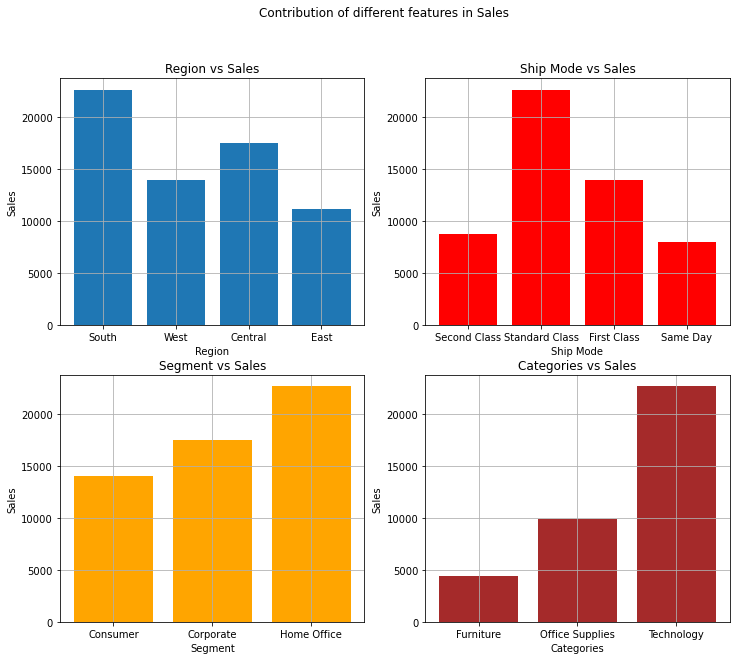

In [15]:
fig, ax = plt.subplots(figsize=(12,10),
                       nrows=2,
                       ncols=2)
fig.suptitle('Contribution of different features in Sales Price')
ax[0,0].bar(data.Region, data.Sales)
ax[0,0].set_xlabel('Region')
ax[0,0].set_ylabel('Sales')
ax[0,0].set_title('Region vs Sales')
ax[0,0].grid(visible = True)

ax[0,1].bar(data['Ship Mode'], data.Sales, color = 'red')
ax[0,1].set_xlabel('Ship Mode')
ax[0,1].set_ylabel('Sales')
ax[0,1].set_title('Ship Mode vs Sales')
ax[0,1].grid(visible = True)

ax[1,0].bar(data['Segment'], data['Sales'], color = 'orange')
ax[1,0].set_xlabel('Segment')
ax[1,0].set_ylabel('Sales')
ax[1,0].set_title('Segment vs Sales')
ax[1,0].grid(visible = True)

ax[1,1].bar(data.Category, data.Sales, color = 'brown')
ax[1,1].set_xlabel('Categories')
ax[1,1].set_ylabel('Sales')
ax[1,1].set_title('Categories vs Sales')
ax[1,1].grid(visible = True)


From above graph we can find out :

**Region vs Sales**
* South region has highest sales Price of products around 24,000 and approx 10,000 more than Central region which is 2nd highest in sales price
* West and East regions have lower sales price with West having comparitively higher than East

**Ship Mode vs Sales**
* Standard Class ship mode has the greatest sales price around 24,000 with First Class at around 14,000
* Same day and Second Class Shipment have lower almost similar sales prices.

**Segment vs Sales**
* Home Office Segment has greater sales price than Corporate and Consumer ones

**Categories vs Sales**
* Technology category have the highest sales price with furniture category the lowest

Thus we deduce, lower sales price are accounted in:
1. West and East Regions
2. Second Class and Same Day Shipments
3. Consumer and Corporate (to an extent) Segment
4. Furniture and Office Supplies

#### Sale Price and Profit Analysis

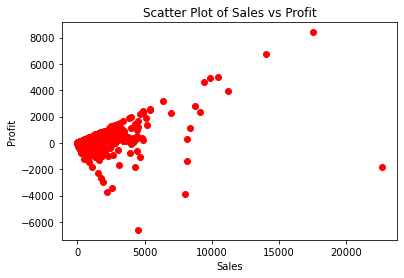

In [10]:
fig, ax = plt.subplots()
ax.scatter(data['Sales'], data['Profit'], color = 'red')
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_title('Scatter Plot of Sales Price vs Profit');

From above `scatterplot()` we notice that there is an increasing trend of Sales Price with profit i.e **the higher the sales price, the greater the profit** and this is true if we see the correlation we found out earlier which shows sales and profit are correlated (not quite strongly though) with a value of *0.47*

Next, we will look how Profit affects different aspects of the business, to get a more clear picture

#### Features Impacting Profit

In [3]:
for (columns, content) in data.iteritems():
    if columns == 'Ship Mode':
        for cat in content.unique():
            data[columns + 'Profit Sum'] = data[data[columns] == cat].Profit.sum()
            data[cat+'Profit Sum'] = data[data[columns] == cat].Profit.sum()
    elif columns == 'Segment':
        for cat in content.unique():
            data[cat+'Profit Sum'] = data[data[columns] == cat].Profit.sum()
    elif columns == 'Region':
        for cat in content.unique():
            data[cat+'Profit Sum'] = data[data[columns] == cat].Profit.sum()
    elif columns == 'Category':
        for cat in content.unique():
            data[cat+'Profit Sum'] = data[data[columns] == cat].Profit.sum()
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,...,ConsumerProfit Sum,CorporateProfit Sum,Home OfficeProfit Sum,SouthProfit Sum,WestProfit Sum,CentralProfit Sum,EastProfit Sum,FurnitureProfit Sum,Office SuppliesProfit Sum,TechnologyProfit Sum
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,...,134119.2092,91979.134,60298.6785,46749.4303,108418.4489,39706.3625,91522.78,18451.2728,122490.8008,145454.9481
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,...,134119.2092,91979.134,60298.6785,46749.4303,108418.4489,39706.3625,91522.78,18451.2728,122490.8008,145454.9481
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,...,134119.2092,91979.134,60298.6785,46749.4303,108418.4489,39706.3625,91522.78,18451.2728,122490.8008,145454.9481
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,...,134119.2092,91979.134,60298.6785,46749.4303,108418.4489,39706.3625,91522.78,18451.2728,122490.8008,145454.9481
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,...,134119.2092,91979.134,60298.6785,46749.4303,108418.4489,39706.3625,91522.78,18451.2728,122490.8008,145454.9481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,...,134119.2092,91979.134,60298.6785,46749.4303,108418.4489,39706.3625,91522.78,18451.2728,122490.8008,145454.9481
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,...,134119.2092,91979.134,60298.6785,46749.4303,108418.4489,39706.3625,91522.78,18451.2728,122490.8008,145454.9481
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,...,134119.2092,91979.134,60298.6785,46749.4303,108418.4489,39706.3625,91522.78,18451.2728,122490.8008,145454.9481
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,...,134119.2092,91979.134,60298.6785,46749.4303,108418.4489,39706.3625,91522.78,18451.2728,122490.8008,145454.9481


Text(0.5, 1.0, 'Segment vs Profit')

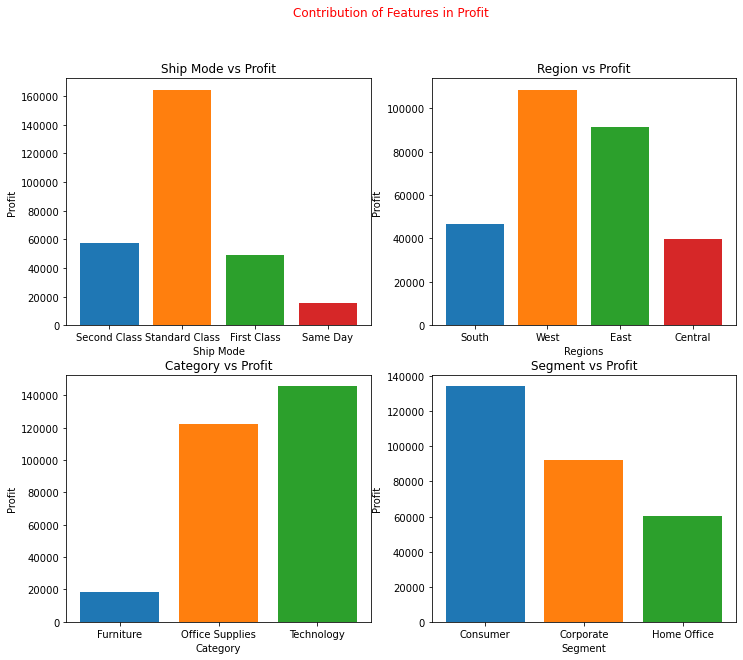

In [4]:
fig, ax = plt.subplots(figsize=(12,10),
                       nrows = 2,
                       ncols = 2)
fig.suptitle('Contribution of Features in Gross Profit', color = 'red')
ax[0,0].bar('Second Class' , data['Second ClassProfit Sum'])
ax[0,0].bar('Standard Class', data['Standard ClassProfit Sum'])
ax[0,0].bar('First Class', data['First ClassProfit Sum'])
ax[0,0].bar('Same Day', data['Same DayProfit Sum'])
ax[0,0].set_xlabel('Ship Mode')
ax[0,0].set_ylabel('Profit')
ax[0,0].set_title('Ship Mode vs Profit')

ax[0,1].bar('South',data['SouthProfit Sum'])
ax[0,1].bar('West',data['WestProfit Sum'])
ax[0,1].bar('East',data['EastProfit Sum']) 
ax[0,1].bar('Central', data['CentralProfit Sum'])
ax[0,1].set_xlabel('Regions')
ax[0,1].set_ylabel('Profit')
ax[0,1].set_title('Region vs Profit')

ax[1,0].bar('Furniture', data['FurnitureProfit Sum'])
ax[1,0].bar('Office Supplies',data['Office SuppliesProfit Sum'])
ax[1,0].bar('Technology',data['TechnologyProfit Sum'])
ax[1,0].set_xlabel('Category')
ax[1,0].set_ylabel('Profit')
ax[1,0].set_title('Category vs Profit')

ax[1,1].bar('Consumer', data['ConsumerProfit Sum']) 
ax[1,1].bar('Corporate', data['CorporateProfit Sum'])
ax[1,1].bar('Home Office',data['Home OfficeProfit Sum'])
ax[1,1].set_xlabel('Segment')
ax[1,1].set_ylabel('Profit')
ax[1,1].set_title('Segment vs Profit');

From above graph we figure out:

**Ship Mode vs Profit**

* The Standard Class generates the most profit in excess of 1,60,000 and Same Day shipment produces the least Profit
* Second Class and First Class generate approx. similar profits in range of 4000 - 6000

**Region vs Profit**

* The West and East Regions produce the greater profits while South and Central Regions produce the lowest

**Category vs Profit**

* The Technology category produces highest profit in excess of 1,40,000
* Office category produces the seocnd most profit while Furniture category generates the lowest profit

**Segment vs Profit**

* The Consumer Segment produces the highest profit while Home Office segment produces the least

Thus lower profit is accounted in ;
1. Same Day Shipments
2. South and Central Regions
3. Furniture Category 
4. Home Office Segment

Now we will look which Furniture Category affects the Sales and Profts

#### Furniture Category Analysis

In [34]:
Furniture = data[data['Category']== 'Furniture']
Furniture['Sub-Category'].value_counts()

Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub-Category, dtype: int64

To look at their contribution profit/losses we will produce a gross value for each category for better visualization and understanding

In [49]:
bookcases = Furniture[Furniture['Sub-Category'] == 'Bookcases'].Profit.sum()
chairs = Furniture[Furniture['Sub-Category'] == 'Chairs'].Profit.sum()
tables = Furniture[Furniture['Sub-Category'] == 'Tables'].Profit.sum()
furnishings = Furniture[Furniture['Sub-Category'] == 'Furnishings'].Profit.sum()

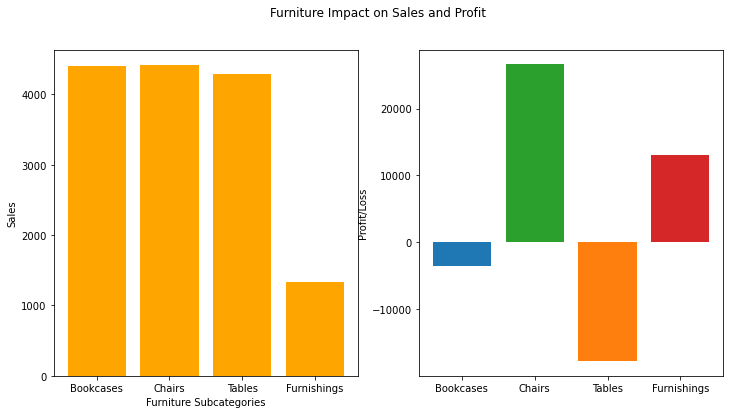

In [50]:
fig, (ax1,ax2) = plt.subplots(figsize = (12,6),
                              nrows=1,
                              ncols=2,
                              sharex = True)
fig.suptitle('Furniture Impact on Sales and Profit')
ax1.bar(Furniture['Sub-Category'], Furniture['Sales'], color = 'orange')
ax1.set_xlabel('Furniture Subcategories')
ax1.set_ylabel('Sales')
ax2.bar('Bookcases', bookcases)
ax2.bar('Tables', tables)
ax2.bar('Chairs', chairs)
ax2.bar('Furnishings', furnishings)
ax2.set_ylabel('Profit/Loss');

Here we find out that;
* Bookcases have high sales price but are actually producing loss in excess of 2000(dollars).
* Similarly, Tables also have the higher sale price but are producing greater losses approx around 18,000(dollars).
* Chairs produce greater profit despite of greater sale prices.
* Furnishings have lower sale price but are more profitable than bookcases and tables, generating profits of around 12,000(dollars).

#### Discount Affecting Sales and Profit

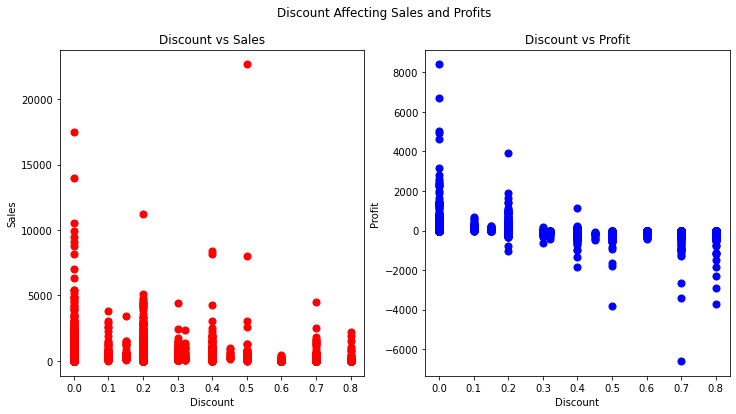

In [44]:
fig, (ax1,ax2) = plt.subplots(figsize=(12,6),
                              nrows=1,
                              ncols=2,
                       )
fig.suptitle('Discount Affecting Sales and Profits')
ax1.scatter(data['Discount'],data['Sales'], s = 50, color = 'red')
ax1.set_xlabel('Discount')
ax1.set_ylabel('Sales')
ax1.set_title('Discount vs Sales')
ax2.scatter(data['Discount'], data['Profit'], s = 50, color = 'blue')
ax2.set_xlabel('Discount')
ax2.set_ylabel('Profit')
ax2.set_title('Discount vs Profit');

Here we find out that:

**Discount vs Sales**
* Lower discount ranges below 0.3 (or 30 percent) are generally applicable on greater sale price products.
* Greater discount ranges above 0.3 have fewer sale price even below 2000(dollars)

**Discount vs Profit**
* The less discounted products contribute to higher profits.
* Discounts below 0.4 (or 40 percent) are profitable.
* Discounts above 0.4 are generating losses.

**Note**:
*Decreasing discounts increases profits and vice versa*

#### Quantity Impact on Sale Price and Profit

In [ ]:
fig, bar_ax = plt.subplots()
bar_ax.bar(data['Quantity'], data['Sales'], color = 'orange')
bar_ax.set_xlabel('Sub-Categories of Products')
bar_ax.set_ylabel('Sales')
bar_ax.tick_params('y', color = 'orange')

line_ax = bar_ax.twinx()
line_ax.scatter(data['Quantity'], data['Profit'], color = 'blue')
line_ax.set_ylabel('Profit')
line_ax.tick_params('y', color = 'blue')


In [11]:
for (column, content) in data.iteritems():
    if column == 'Quantity':
        for con in content.unique():
            data['Quantity '+str(con)] = data[data[column] == con ].Profit.sum()
data


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,...,Quantity 4,Quantity 6,Quantity 9,Quantity 1,Quantity 8,Quantity 14,Quantity 11,Quantity 13,Quantity 10,Quantity 12
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,...,44223.3908,10325.4678,17687.8908,7440.4801,10856.796,2724.0038,4293.3671,6348.901,2044.157,1185.066
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,...,44223.3908,10325.4678,17687.8908,7440.4801,10856.796,2724.0038,4293.3671,6348.901,2044.157,1185.066
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,...,44223.3908,10325.4678,17687.8908,7440.4801,10856.796,2724.0038,4293.3671,6348.901,2044.157,1185.066
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,...,44223.3908,10325.4678,17687.8908,7440.4801,10856.796,2724.0038,4293.3671,6348.901,2044.157,1185.066
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,...,44223.3908,10325.4678,17687.8908,7440.4801,10856.796,2724.0038,4293.3671,6348.901,2044.157,1185.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,...,44223.3908,10325.4678,17687.8908,7440.4801,10856.796,2724.0038,4293.3671,6348.901,2044.157,1185.066
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,...,44223.3908,10325.4678,17687.8908,7440.4801,10856.796,2724.0038,4293.3671,6348.901,2044.157,1185.066
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,...,44223.3908,10325.4678,17687.8908,7440.4801,10856.796,2724.0038,4293.3671,6348.901,2044.157,1185.066
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,...,44223.3908,10325.4678,17687.8908,7440.4801,10856.796,2724.0038,4293.3671,6348.901,2044.157,1185.066


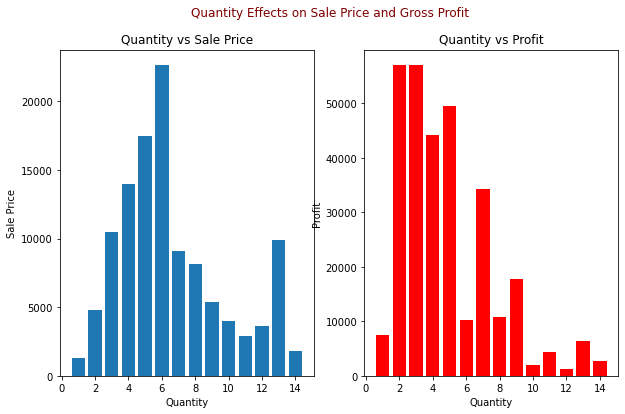

In [95]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,6),
                       nrows = 1,
                       ncols = 2)
fig.suptitle('Quantity Effects on Sale Price and Gross Profit', color = 'maroon')
ax1.bar(data['Quantity'], data['Sales'])
ax1.set_xlabel('Quantity')
ax1.set_ylabel('Sale Price')
ax1.set_title('Quantity vs Sale Price')

ax2.bar(1, data['Quantity 1'], color = 'red')
ax2.bar(2, data['Quantity 2'], color = 'red')
ax2.bar(3, data['Quantity 3'], color = 'red')
ax2.bar(2, data['Quantity 3'], color = 'red')
ax2.bar(4, data['Quantity 4'], color = 'red')
ax2.bar(5, data['Quantity 5'], color = 'red')
ax2.bar(6, data['Quantity 6'], color = 'red')
ax2.bar(7, data['Quantity 7'], color = 'red')
ax2.bar(8, data['Quantity 8'], color = 'red')
ax2.bar(9, data['Quantity 9'], color = 'red')
ax2.bar(10, data['Quantity 10'], color = 'red')
ax2.bar(11, data['Quantity 11'], color = 'red')
ax2.bar(12, data['Quantity 12'], color = 'red')
ax2.bar(13, data['Quantity 13'], color = 'red')
ax2.bar(14, data['Quantity 14'], color = 'red')

ax2.set_xlabel('Quantity')
ax2.set_ylabel('Profit')
ax2.set_title('Quantity vs Profit');


### Observations and Conclusions:

#### Region Wise:

* **South** and **Central** Regions have greater Sale Prices of products and lower Profits, thus lower Sale Prices in these regions might escalate the profits.

#### Shipment wise:

* **Standard Class** shipment is the most ideal of all and should be majorly adopted while **First Class** shipment takes higher Sale Price products and generates less Profit while **Same Day** shipment generates very low Profit 

#### Category wise:

* **Technology** products are highly profitable and should be sold more while furniture products are less fruitful in terms of Profit 
* **Office Supplies** also generate more Profit even with less Sale Price, thus they are cheaper than technology and therefore should be increased in supply.

#### Segment Wise:

* **Consumer goods** are highly favourable for business due to lower Selling Price and greater Profits - thus business must increase their supply.

* **Home Office** products have high Sale Price and lower Profits and thus must be reduced in supply while **Furniture** is not much profitable product for the business even with lower selling prices.

However, digging deeper we realized certain products in **Furniture** produce better business outcomes than the rest.

#### Furniture Sub-Category:

* **Tables** and **Bookcases** along with high selling price incur losses to the business especially tables which are highly unprofitable
* **Furnishings** are cheaper and also generate high profits and therefore must be increased in supply while **Chairs** are also profitable for the business. 

#### Discounts:

* The greater the discount the lesser the profits
* Discounts above 40 percent should be avoided as they can incur losses to the business

#### Quantity:

* Fewer quantity products are more profitable than higher ones.
* 2-5 quantities are increasingly profitable